# Plot cluster map of samples hallmark gene set NES

Script related to figure s1e

### Aim:
- Plot clustermap of hallmark NES as additional visualisation

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [2]:
import warnings
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file

In [4]:
file_keys = home + "/Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity_mRNAtumourCellularity.txt"

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [5]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES,TumourCellularity_mRNA,mRNA_binary_TumourCellularity
Well,,,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973,0.730147,Low
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065,0.673548,Low
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551,0.664978,Low
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496,0.833913,High
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706,0.801248,High


### Define sample colours

In [6]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

## Load ssGSEA results

In [7]:
file_nes = home + "/Data/1/HallmarksStromaImmune_NES.txt"

data_nes = pd.read_csv(file_nes,
                       sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [8]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
HALLMARK_KRAS_SIGNALING_UP,0.149440,0.176716,0.187943,0.096393,0.132405,0.121711,0.074581,0.104277,0.104577,0.092948,...,0.171905,0.204270,0.167651,0.154968,0.157046,0.202677,0.228180,0.196847,0.205690,0.121802
HALLMARK_KRAS_SIGNALING_DN,-0.240767,-0.274158,-0.231857,-0.240881,-0.228270,-0.240445,-0.196578,-0.239584,-0.238470,-0.236185,...,-0.242543,-0.231446,-0.232364,-0.218667,-0.252284,-0.214025,-0.224493,-0.195860,-0.218489,-0.198529
HALLMARK_PANCREAS_BETA_CELLS,-0.170571,-0.158940,-0.230501,-0.147195,-0.209698,-0.166047,-0.163780,-0.171125,-0.128802,-0.200665,...,-0.181282,-0.161556,-0.172433,-0.101169,-0.136589,-0.175828,-0.131121,-0.125134,-0.137935,-0.160385
StromalSignature,0.087415,0.136906,0.166492,0.010237,0.034615,0.021982,-0.067309,-0.046947,-0.026127,-0.022315,...,0.109234,0.203958,0.155354,0.134444,0.076000,0.175493,0.250390,0.172685,0.212197,-0.014386
ImmuneSignature,0.192483,0.256464,0.230664,0.080746,0.117609,0.089100,-0.014748,0.049217,-0.023908,-0.045061,...,0.053588,0.152762,0.052564,0.097643,0.051716,0.220956,0.205281,0.183085,0.224095,0.012900


### Define gene set colors

In [9]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'HALLMARK_INTERFERON_ALPHA_RESPONSE':           GREEN,
'HALLMARK_INTERFERON_GAMMA_RESPONSE':           GREEN,
'ImmuneSignature':                              GREEN,
'HALLMARK_E2F_TARGETS':                         RED,
'HALLMARK_SPERMATOGENESIS':                     GREY,
'HALLMARK_INFLAMMATORY_RESPONSE':               GREEN,
'HALLMARK_G2M_CHECKPOINT':                      RED,
'HALLMARK_PANCREAS_BETA_CELLS':                 GREY,
'HALLMARK_OXIDATIVE_PHOSPHORYLATION':           GREY,
'HALLMARK_MYC_TARGETS_V1':                      RED,
'HALLMARK_FATTY_ACID_METABOLISM':               GREY,
'HALLMARK_PEROXISOME':                          GREY,
'HALLMARK_DNA_REPAIR':                          RED,
'HALLMARK_UNFOLDED_PROTEIN_RESPONSE':           'purple',
'HALLMARK_KRAS_SIGNALING_DN':                   RED,
'HALLMARK_REACTIVE_OXIGEN_SPECIES_PATHWAY':     'purple',
'HALLMARK_CHOLESTEROL_HOMEOSTASIS':             GREY,
'HALLMARK_COMPLEMENT':                          GREEN,
'HALLMARK_MTORC1_SIGNALING':                    RED,
'HALLMARK_IL2_STAT5_SIGNALING':                 GREEN,
'HALLMARK_ADIPOGENESIS':                        GREY,
'HALLMARK_KRAS_SIGNALING_UP':                   RED,
'HALLMARK_HEME_METABOLISM':                     GREY,
'HALLMARK_PI3K_AKT_MTOR_SIGNALING':             RED,
'HALLMARK_ANDROGEN_RESPONSE':                   GREY,
'HALLMARK_PROTEIN_SECRETION':                   GREY,
'HALLMARK_P53_PATHWAY':                         RED,
'HALLMARK_UV_RESPONSE_UP':                      'purple',
'HALLMARK_MYC_TARGETS_V2':                      RED,
'StromalSignature':                             BLUE,
'HALLMARK_MITOTIC_SPINDLE':                     RED,
'HALLMARK_GLYCOLYSIS':                          RED,
'HALLMARK_APICAL_JUNCTION':                     BLUE,
'HALLMARK_HYPOXIA':                             'purple',
'HALLMARK_TNFA_SIGNALING_VIA_NFKB':             GREEN,
'HALLMARK_APOPTOSIS':                           GREY,
'HALLMARK_APICAL_SURFACE':                      GREY,
'HALLMARK_UV_RESPONSE_DN':                      'purple',
'HALLMARK_TGF_BETA_SIGNALING':                  'purple',
'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION':   BLUE,
'HALLMARK_NOTCH_SIGNALING':                     RED,
'HALLMARK_WNT_BETA_CATENIN_SIGNALING':          RED,
'HALLMARK_ALLOGRAFT_REJECTION':                 GREEN,
'HALLMARK_XENOBIOTIC_METABOLISM':               GREY,
'HALLMARK_ANGIOGENESIS':                        BLUE,
'HALLMARK_BILE_ACID_METABOLISM':                GREY,
'HALLMARK_COAGULATION':                         GREY,
'HALLMARK_ESTROGEN_RESPONSE_EARLY':             GREY,
'HALLMARK_ESTROGEN_RESPONSE_LATE':              GREY,
'HALLMARK_HEDGEHOG_SIGNALING':                  RED,
'HALLMARK_IL6_JAK_STAT3_SIGNALING':             GREEN,
'HALLMARK_MYOGENESIS':                          GREY,
'Purity_RNA':                                  'k',
'TumourCellularity_mRNA': 'k'
}

In [10]:
color_sets_df = pd.DataFrame.from_dict(color_sets, orient='index')

In [11]:
color_sets_df.head()

,0
HALLMARK_INTERFERON_ALPHA_RESPONSE,#007F00
HALLMARK_INTERFERON_GAMMA_RESPONSE,#007F00
ImmuneSignature,#007F00
HALLMARK_E2F_TARGETS,#CC0000
HALLMARK_SPERMATOGENESIS,#D3D3D3


### Map tumour cellularity info to cmap (missing tumour cellularity set to red)

In [12]:
median_tumcell = sample_labels['TumourCellularity_WES'].median()
sample_labels['TumCell_WES_bin'] = sample_labels['TumourCellularity_WES'] > median_tumcell

In [13]:
sample_labels['TumCell_WES_bin'].replace([True,False],
                                         ['k','w'],
                                         inplace=True)

In [14]:
cmp = plt.cm.binary
norm = matplotlib.colors.Normalize(vmin=sample_labels['TumourCellularity_WES'].min(),
                                   vmax=sample_labels['TumourCellularity_WES'].max(),
                                   clip=False)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=cm.binary)

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    tumcell_vals = mapper.to_rgba(sample_labels['TumourCellularity_WES'])
    print ('NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For')

    na_ind = [i for i, x in enumerate(sample_labels['TumourCellularity_WES'].isna()) if x]

tumcell_vals[na_ind] = [0,0,0,0]

NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For


### Plot

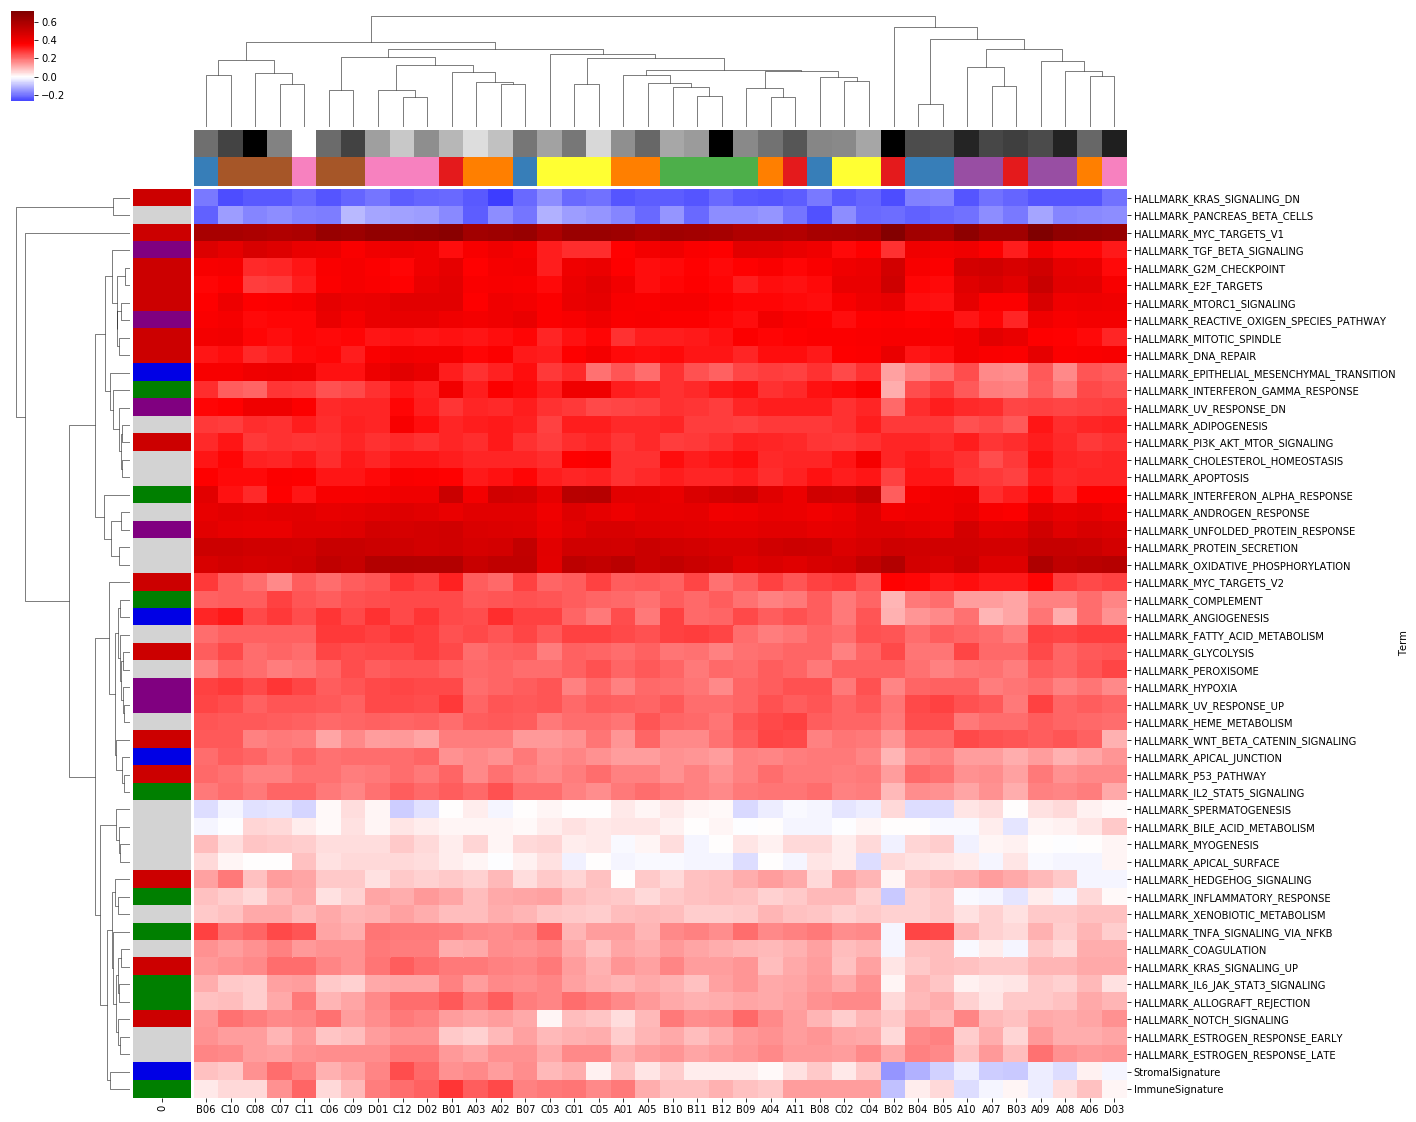

In [15]:
g = sns.clustermap(data_nes,
                   cmap='seismic',
                   center=0,
                   figsize = (20,20),
                   col_colors=[tumcell_vals,
                               sample_labels['Colour']],
                   row_colors=color_sets_df[0],
                   linewidths=0.0, rasterized=True
                  )

In [16]:
data_nes.shape

(52, 38)

### Save plot

In [17]:
ls ../../Figures/supplementary/1/

OVCT_Fig_s1.pdf  OVCT_Fig_s1.png  README.md        panels/


In [18]:
FILE = "../../Figures/supplementary/1/panels/s1e_TreatmentNaive_Hallmarks_NES_clustermap.pdf"

g.savefig(FILE, bbox='tight')

# End script